## Time Series - ARIMA assignment

As part of MLDL time series assignment, it is expected to predict the sales value using an ARIMA model. The dataset contains 3 years sales data for each month. Hence the totla length is 36.

The time series analysis includes the following:
* Check missing values - Fill them with aggregate values
* Do adfuller test - to check if the data is stationary (if not, check for differencing)
* Do the time series decomposition - to check for seasonal patterns (not done here as it is not required)
* Get the ACF and PACF max parameter values from their respective plots
* Get the best ARIMA model by trying with different combinations of parameters
* Predict the future values
* Plot the results

**Import Libraries**

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [77]:
raw_data = pd.read_csv('https://raw.githubusercontent.com/blue-yonder/pydse/master/pydse/data/sales-of-shampoo-over-a-three-ye.csv', sep=';')
df= raw_data.copy()

In [78]:
df.head()

,Month,Sales
0,01-01,266.0
1,01-02,145.9
2,01-03,183.1
3,01-04,119.3
4,01-05,180.3


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   36 non-null     object 
 1   Sales   36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 704.0+ bytes


In [80]:
df.shape

(36, 2)

**EDA**

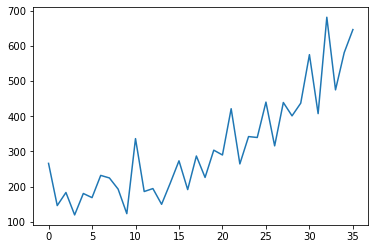

In [81]:
df.Sales.plot()
plt.show()

**Adfuller Test**

In [82]:
from statsmodels.tsa.stattools import adfuller
adfuller(df.Sales)

(3.0601420836411815,
 1.0,
 10,
 25,
 {'1%': -3.7238633119999998, '5%': -2.98648896, '10%': -2.6328004},
 278.99726442630316)

As per the adfuller test, the p value is 1.0 which is greater than the significance level of 0.05. Hence, the series is not stationary. In order to make the series stationary, we need to use the differencing method.

**Adfuller test for differencing**

In [83]:
adfuller(df.Sales.diff()[1:])

(-7.249074055553857,
 1.7998574141686703e-10,
 1,
 33,
 {'1%': -3.6461350877925254,
  '5%': -2.954126991123355,
  '10%': -2.6159676124885216},
 275.32503579406307)

In [84]:
df['Diff'] = df.Sales.diff()
df.head()

,Month,Sales,Diff
0,01-01,266.0,NaN
1,01-02,145.9,-120.1
2,01-03,183.1,37.2
3,01-04,119.3,-63.8
4,01-05,180.3,61.0


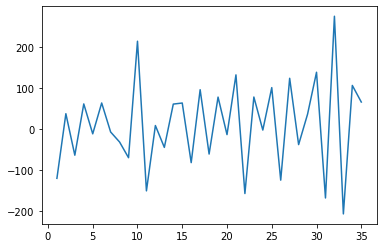

In [87]:
df.Diff.plot()
plt.show()

In [89]:
len(df.Diff[1:])

35

In [109]:
X = df.Diff[1:].values

**Train Test Split**

In [110]:
size = int(len(X) * 0.8)
train, test = X[:size], X[size:]

In [111]:
history = [x for x in train]

**ACF-PACF plots for differencing**

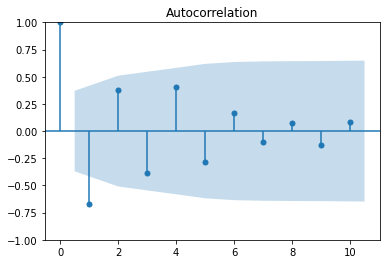

In [113]:
import statsmodels.graphics.tsaplots as sgt
sgt.plot_acf(history, lags=10)
plt.show()

C:\Users\rames\anaconda3\envs\assignments\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


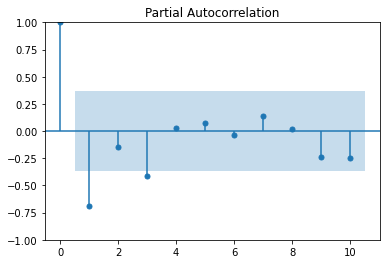

In [114]:
sgt.plot_pacf(history, lags=10)
plt.show()

As per the ACF and PACF plots, the first lag in both of them seems to be abve the significant level. Hence, let us proceed with building the model using ARIMA(1,0,1) and getting predictions.

**Building the model**

In [115]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(history, order=(1,0,1))
results_AR = model.fit()
results_AR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   28
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -154.515
Date:                Tue, 22 Feb 2022   AIC                            317.029
Time:                        19:54:29   BIC                            322.358
Sample:                             0   HQIC                           318.658
                                 - 28                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.3356      3.297      2.528      0.011       1.873      14.799
ar.L1         -0.4225      0.365     -1.157      0.247      -1.138       0.293
ma.L1         -0.6704      0.267     -2.513      0.012      -1.193      -0.148
sigma2      3472.8940   1057.634      3.284      0.001    1399.970    5545.818
===================================================================================
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):                 0.43
Prob(Q):                              0.62   Prob(JB):                         0.81
Heteroskedasticity (H):               0.90   Skew:                             0.28
Prob(H) (two-sided):                  0.88   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [116]:
predictions_AR = results_AR.predict(start=len(train), end=len(train)+len(test)-1)

In [119]:
predictions_AR

array([9.46826913, 7.85706104, 8.53781361, 8.25018841, 8.37171312,
       8.32036763, 8.34206165])

**Evaluation**

In [117]:
from sklearn.metrics import mean_squared_error
rmse_AR = np.sqrt(mean_squared_error(test, predictions_AR))
rmse_AR

159.78294222749068

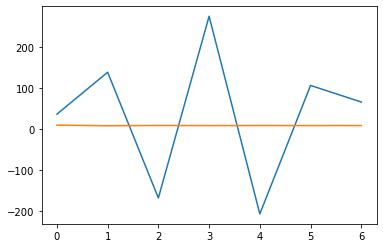

In [118]:
plt.plot(test)
plt.plot(predictions_AR)
plt.show()

Observation: This shows the model had done a good job in predicting the time series on the difference data having a lag of 1.